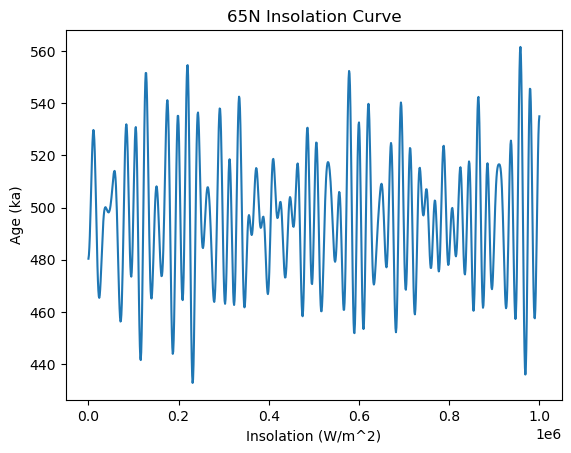

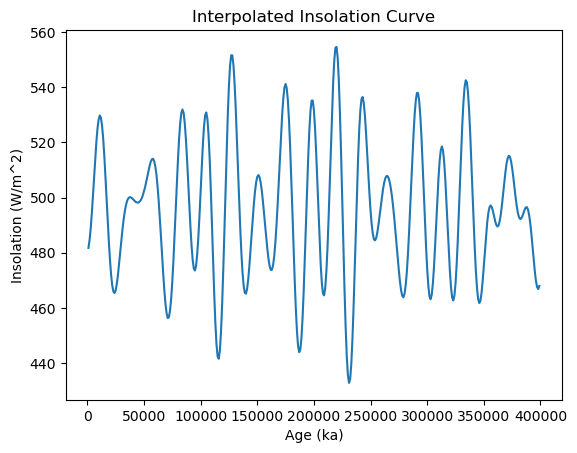

Text(0, 0.5, 'Age (ka)')

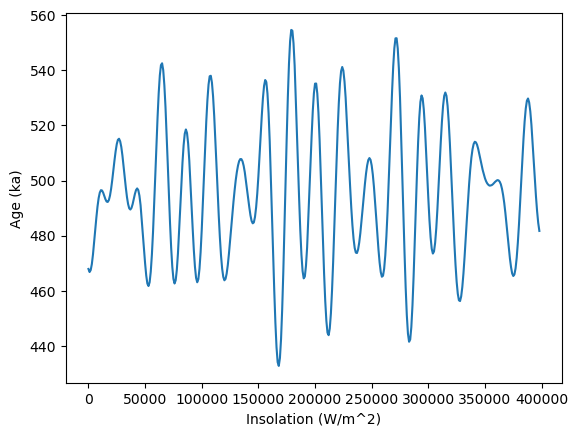

In [21]:
# read the 65N_inso_June21.txt under the data folder
import pandas as pd
import numpy as np

file_path = r"D:\VScode\van2015_repeat\VOSTOK_data\65N_inso_June21.txt"
df_inso = pd.read_csv(file_path, sep='\s+', header=None, engine='python')
df_inso.columns = ['age', 'inso']
df_inso['age'] = df_inso['age'] * -1000

# flip the columns unpside down and reset the index
df_inso = df_inso[::-1].reset_index(drop=True)
# plot df_inso
import matplotlib.pyplot as plt
plt.figure()
plt.plot(df_inso['age'], df_inso['inso'])
plt.xlabel('Insolation (W/m^2)')
plt.ylabel('Age (ka)')
plt.title('65N Insolation Curve')
plt.show()

df_inso.sort_values(by='age', inplace=True)
time_new = np.arange(1000,399001, 1000)  # 799000 inclusive
age_inso = df_inso['age'].values
inso_values = df_inso['inso'].values
inso_interpolated = np.interp(time_new, age_inso, inso_values)

# plot the interpolated insolation curve
plt.figure()
plt.plot(time_new, inso_interpolated)
plt.xlabel('Age (ka)')
plt.ylabel('Insolation (W/m^2)')
plt.title('Interpolated Insolation Curve')
plt.show()


age_max = time_new.max()
time_new_transformed = -time_new + age_max

df_inso = pd.DataFrame({'age': time_new_transformed, 'inso': inso_interpolated})
# plot df_inso
plt.figure()
plt.plot(df_inso['age'], df_inso['inso'])
plt.xlabel('Insolation (W/m^2)')
plt.ylabel('Age (ka)')

0.0 422766.0


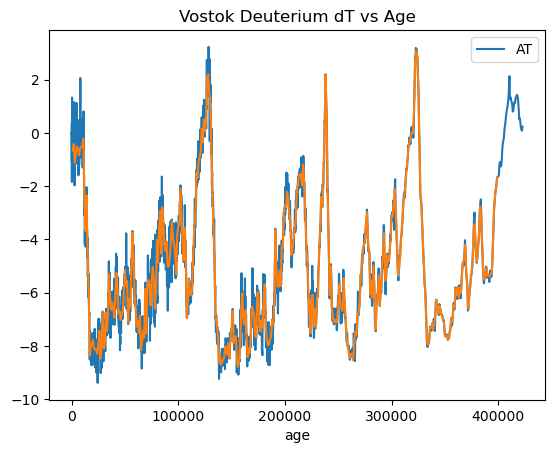

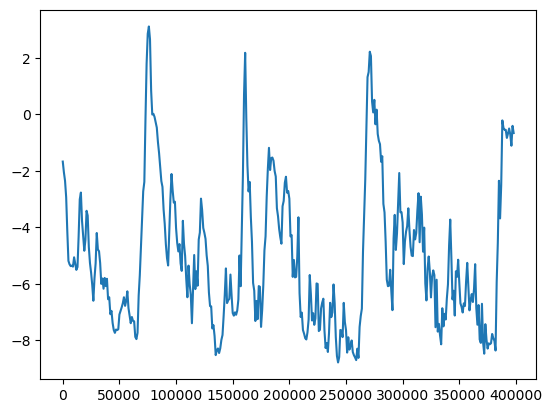

In [22]:
# read Vostok_Deut_dT.tab under D:\VScode\van2015_repeat\data and skip the first 3 rows

import pandas as pd

df_AT = pd.read_csv('D:/VScode/van2015_repeat/VOSTOK_data/Vostok_Deut_dT.tab', sep='\t', skiprows=16)
# extract the second and last columns and rename to age and AT
df_AT = df_AT.iloc[:, [1, -1]]
df_AT.columns = ['age', 'AT']
# age=age*1000
df_AT['age'] = df_AT['age']*1000
# plot AT
df_AT.plot(x='age', y='AT', title='Vostok Deuterium dT vs Age')

df_AT.head()
# print the age min and max
print(df_AT['age'].min(), df_AT['age'].max())


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

time_new = np.arange(1000,399001, 1000)  # 799000 inclusive

# ------------------------------------------------------------------
# 3) Sort each DataFrame by 'age' (important for np.interp)
# ------------------------------------------------------------------
df_AT.sort_values(by='age', inplace=True)


# Convert columns to NumPy arrays
age_AT = df_AT['age'].values
AT_values = df_AT['AT'].values

AT_interpolated = np.interp(time_new, age_AT, AT_values)

# lot the interpolated data
plt.plot(time_new, AT_interpolated, label='Interpolated Data')
plt.title('Vostok Deuterium dT vs Age')


age_max = time_new.max()
time_new_transformed = -time_new + age_max

df_AT = pd.DataFrame({'age': time_new_transformed, 'AT': AT_interpolated})
# plot the transformed data in a new figure
plt.figure()
plt.plot(df_AT['age'], df_AT['AT'], label='Transformed Data')


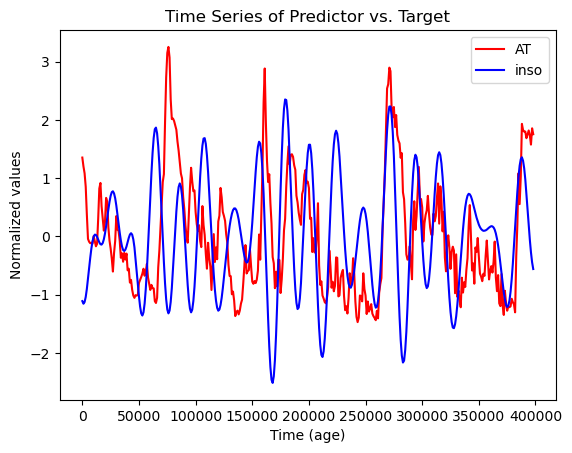

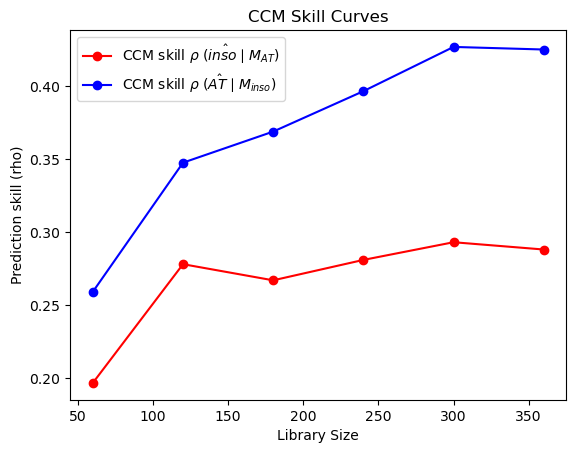

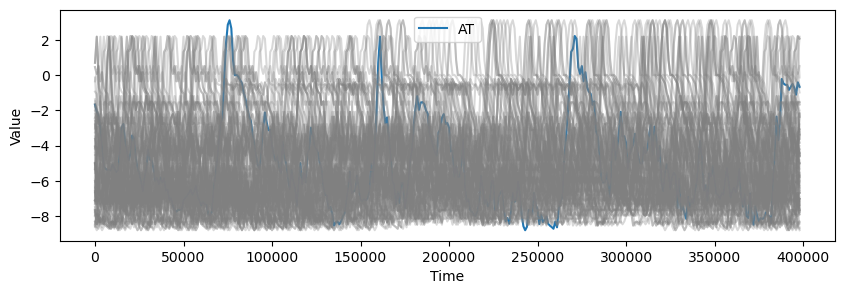

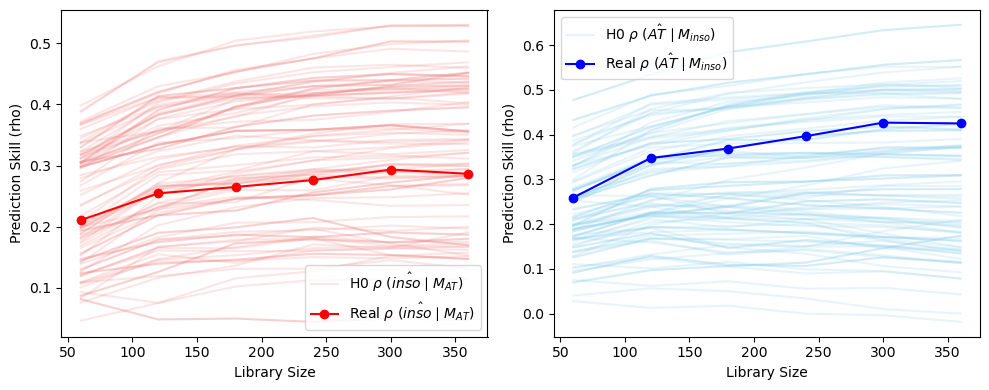

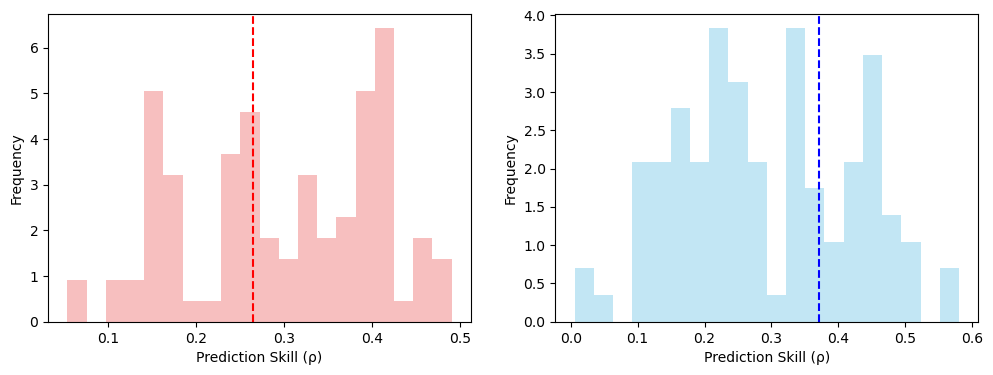

False


In [24]:
from toolbox import ccm_functions as cf
import importlib
importlib.reload(cf)


result = cf.ccm_DOXmapForcing(
    df_sd      = df_AT,
    df_pre     = df_inso,
    E          = 4,
    tau        = 2,
    libSizes   = "60 120 180 240 300 360",
    sample     = 20,
    showPlot   = True
)

from toolbox import significant_test as st
import importlib
importlib.reload(st)

ccm_out, ran_ccm_list,test_result = st.ccm_significance_test(
    df_sd      = df_AT,
    df_pre     = df_inso,
    E         = 4,
    tau       = 2,
    Tp =0,
    n_ran     = 100,
    libSizes  = "60 120 180 240 300 360",
    sample    = 20,
    showPlot  = True
)


print(test_result)